# Projet 2 - Analysez des données de systèmes edicatifs

**Table des matières**<a id='toc0_'></a>    
- 1. [Introduction](#toc1_)    
  - 1.1. [Contexte](#toc1_1_)    
  - 1.2. [Mission](#toc1_2_)    
- 2. [Installation des Librairies](#toc2_)    
- 3. [Importation des données](#toc3_)    
- 4. [Analyse exploratoire](#toc4_)    
  - 4.1. [Data](#toc4_1_)    
  - 4.2. [Series](#toc4_2_)    
  - 4.3. [Country](#toc4_3_)    
  - 4.4. [COUNTRY SERIES](#toc4_4_)    
  - 4.5. [ FOOT NOTE](#toc4_5_)    
- 5. [Sélection des indicateurs pour l'étude](#toc5_)    
- 6. [Création de nouveaux indicateurs :](#toc6_)    
- 7. [Création d'un score](#toc7_)    
- 8. [Sélection des 10 meilleurs pays](#toc8_)    
  - 8.1. [Résultats](#toc8_1_)    
- 9. [Classement par Régions](#toc9_)    
  - 9.1. [Résultat](#toc9_1_)    
- 10. [Graphique de progression temporelle](#toc10_)    
  - 10.1. [Evolution du top 10 pays du score tot](#toc10_1_)    
  - 10.2. [Evolution du top 10 pays de la croissance annuelle](#toc10_2_)    
  - 10.3. [Résultat](#toc10_3_)    
- 11. [PROJECTION](#toc11_)    
  - 11.1. [Indicateur de projection :](#toc11_1_)    
  - 11.2. [Etude du variation en pourcentage de l'indicateur par tranche de 5 ans](#toc11_2_)    
  - 11.3. [Etude de l'évolution de l'indicateur](#toc11_3_)    
  - 11.4. [Top 10 des pays avec l'indicateur de projection en 2025](#toc11_4_)    
    - 11.4.1. [Regroupement et visualisation graphique](#toc11_4_1_)    
- 12. [Création des statistiques par pays et région](#toc12_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Introduction](#toc0_)
### 1.1. <a id='toc1_1_'></a>[Contexte](#toc0_)

Vous êtes Data Scientist dans une start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.  
Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.

### 1.2. <a id='toc1_2_'></a>[Mission](#toc0_)
- Validation de la qualité du jeu de données
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique
- Détemriner dans quels pays l'entreprise doit opérer en priorité 

## 2. <a id='toc2_'></a>[Installation des Librairies](#toc0_)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 3. <a id='toc3_'></a>[Importation des données](#toc0_)

In [2]:
# Chargement des DataFrames : 

data = pd.read_csv('1. Données/EdStatsData.csv')
country = pd.read_csv('1. Données/EdStatsCountry.csv')
country_series = pd.read_csv('1. Données/EdStatsCountry-Series.csv')
series = pd.read_csv('1. Données/EdStatsSeries.csv')
foot_note = pd.read_csv('1. Données/EdStatsFootNote.csv')

## 4. <a id='toc4_'></a>[Analyse exploratoire](#toc0_)
### 4.1. <a id='toc4_1_'></a>[Data](#toc0_)

In [3]:
# Visualisation des premières lignes : 
data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Vérification de doublons sur les pays / indicateurs : 
len(data.loc[data[['Country Code', 'Indicator Code']].duplicated(keep=False), :])

0

In [5]:
# Erreurs de type dans les pays / indicateurs  : 
data[['Country Name','Country Code', 'Indicator Name', 'Indicator Code']].dtypes

Country Name      object
Country Code      object
Indicator Name    object
Indicator Code    object
dtype: object

Il n'y a pas d'erreurs de types 

In [6]:
# Valeurs manquantes sur les pays et indicateurs :
data.isnull().sum()

Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
1970              814642
                   ...  
2085              835494
2090              835494
2095              835494
2100              835494
Unnamed: 69       886930
Length: 70, dtype: int64

In [7]:
# Affichage des données : 
print('Nombre de pays dans Data = ', len(data['Country Name'].value_counts()))
print("Nombre d'indicateurs dans Data = ", len(data.groupby('Indicator Code').count()))

Nombre de pays dans Data =  242
Nombre d'indicateurs dans Data =  3665


### 4.2. <a id='toc4_2_'></a>[Series](#toc0_)

In [8]:
# Visualisation des premières lignes : 
series.head(2) 

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Vérification de doublons sur les Series Code :
len(series.loc[series['Series Code'].duplicated(keep=False), :])

0

In [10]:
# Erreurs de type sur les Series Code : 
series[['Series Code']].dtypes

Series Code    object
dtype: object

In [11]:
# Valeurs manquantes sur les Series Code, Topic, Indicator Name : 
series[['Series Code', 'Topic', 'Indicator Name']].isnull().sum()

Series Code       0
Topic             0
Indicator Name    0
dtype: int64

In [12]:
# Affichage des données : 
print("Nombre d'indicateurs dans Series = ", len(series))

Nombre d'indicateurs dans Series =  3665


--> Il y a autant d'indicateurs dans data et dans series

### 4.3. <a id='toc4_3_'></a>[Country](#toc0_)

In [13]:
# Affichage des premières lignes :
country.head(2) 

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN


In [14]:
# Vérification des doublons dans Country Code : 
len(country.loc[country['Country Code'].duplicated(keep=False), :])

0

In [15]:
# Erreurs de type dans Country Code, Short Name, Region : 
country[['Country Code', 'Short Name', 'Region']].dtypes

Country Code    object
Short Name      object
Region          object
dtype: object

In [16]:
# Valeurs manquantes dans Country Code, Short Name, Region : 
country[['Country Code', 'Short Name', 'Region']].isnull().sum()

Country Code     0
Short Name       0
Region          27
dtype: int64

In [17]:
# Affichage des données : 
print("Nombre de pays dans country = ", len(country))

Nombre de pays dans country =  241


--> Il y a un pays en moins que dans le fichier data

In [18]:
# Recherche du pays manquant : 
ls_pays_data = list(data['Country Code'].unique())
ls_pays_country = list(country['Country Code'].unique())
ls_pays_manquant = []

for p in ls_pays_data:
    if p not in ls_pays_country:
        print(f"Le pays {p} n'est pas dans country")


Le pays VGB n'est pas dans country


--> VGB : Iles vierges Britannique => Négligeable pour l'étude de part sa population de toute façon.

### 4.4. <a id='toc4_4_'></a>[COUNTRY SERIES](#toc0_)

In [19]:
# Affichage des premières lignes : 
country_series.head(2)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


In [20]:
# Vérifications des doublons dans CountryCode, Seriesode : 
len(country_series.loc[country_series[['CountryCode', 'SeriesCode']].duplicated(keep=False), :])

0

In [21]:
# Erreurs de type dans CountryCode, SeriesCode : 
country_series[['CountryCode', 'SeriesCode']].dtypes

CountryCode    object
SeriesCode     object
dtype: object

In [22]:
# Affichage des données : 
print("Nombre de pays dans country_series = ", len(country_series.groupby('CountryCode').count()))
print("Nombre d'indicateur dans country_series = ", len(country_series.groupby('SeriesCode').count()))

Nombre de pays dans country_series =  211
Nombre d'indicateur dans country_series =  21


--> Il manque des pays et des indicateurs par rapport aux autres fichiers ==> à voir si les informations de country series peuvent servir à l'étude mais pas à première vue.


### 4.5. <a id='toc4_5_'></a>[ FOOT NOTE](#toc0_)

In [23]:
# Affichage des premières lignes : 
foot_note.head(2)

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN


In [24]:
# Vérification des doublons dans CountryCode, SeriesCode, Year :
len(foot_note.loc[foot_note[['CountryCode', 'SeriesCode', 'Year']].duplicated(keep=False), :])

0

In [25]:
# Erreurs de type dans CountryCode SeriesCode Year : 
foot_note[['CountryCode', 'SeriesCode', 'Year']].dtypes

CountryCode    object
SeriesCode     object
Year           object
dtype: object

In [26]:
# Affichage des données : 
print("Nombre de pays dans foot_note = ", len(foot_note.groupby('CountryCode').count()))
print("Nombre d'indicateur dans foot_note = ", len(foot_note.groupby('SeriesCode').count()))

Nombre de pays dans foot_note =  239
Nombre d'indicateur dans foot_note =  1558


--> Il manque des pays et des indicateurs par rapport aux autres fichiers ==> à voir si les informations de Foot note peuvent servir à l'étude mais pas à première vue.

## 5. <a id='toc5_'></a>[Sélection des indicateurs pour l'étude](#toc0_)

1. Indicateurs scolaire
    - Enrolment in upper secondary education, both sexes (number) --> UIS.E.3
    - Enrolment in tertiary education, all programmes, both sexes (number) --> SE.TER.ENRL
    - Graduates from tertiary education, both sexes (number) --> SE.TER.GRAD
    
2. Indicateurs technologique 

    - Internet users (per 100 people)--> IT.NET.USER.P2
    - Personal computers (per 100 people) --> IT.CMP.PCMP.P2
  
3. Indicateur de population 

    - Population growth (annual %)--> SP.POP.GROW
    
4. Indicateurs économique 
    
    - GDP per capita, PPP (current international dollar) --> NY.GDP.PCAP.PP.CD   

In [27]:
# Création de data_select (uniquement avec les indicateurs nous intéressants) : 

liste_indicateur = ['UIS.E.3', 'SE.TER.ENRL', 'SE.TER.GRAD', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2',
                   'SP.POP.GROW', 'NY.GDP.PCAP.PP.CD']

data_select = data.loc[data['Indicator Code'].isin(liste_indicateur)].reset_index(drop=True)

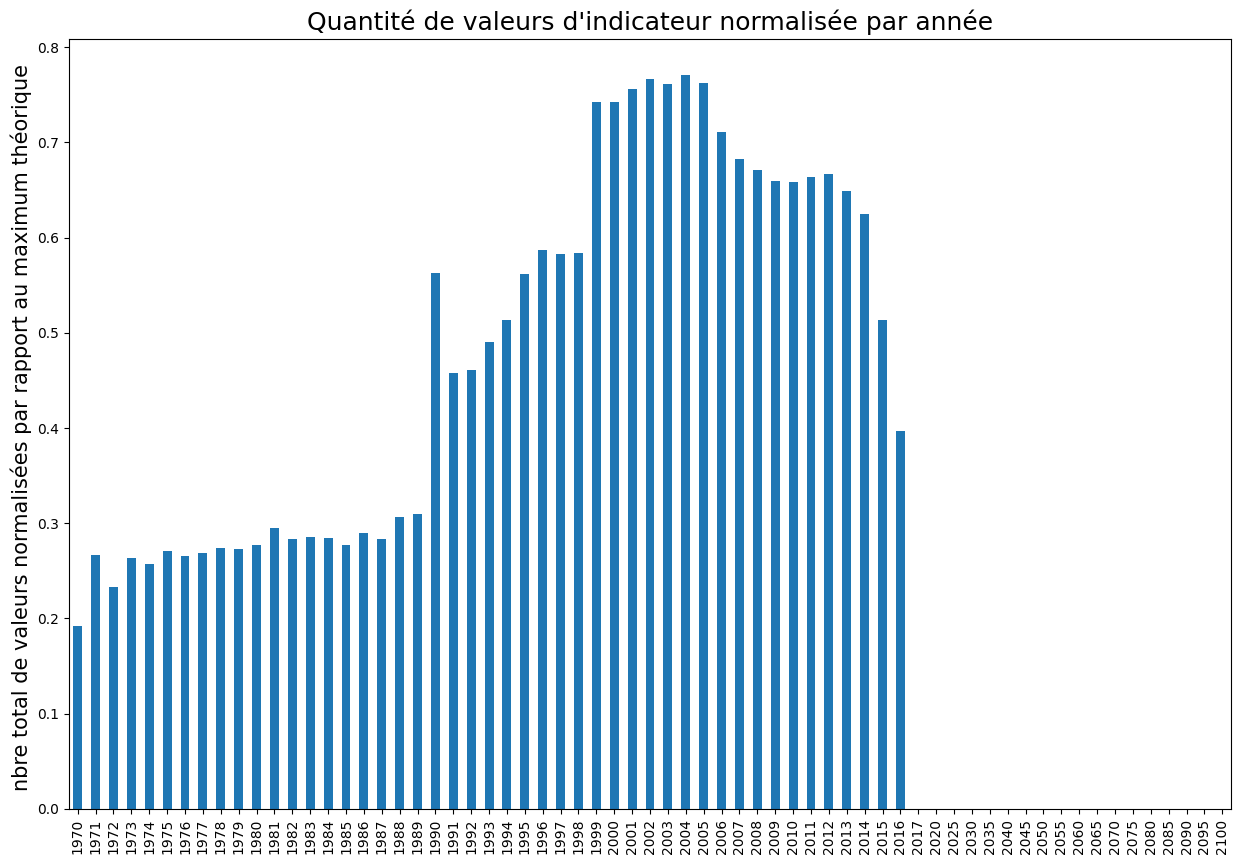

In [28]:
# Visualisation du nombre d'indicateurs dans data_select en fonction des années : 
    # Normalisation du nombre d'indicateurs (division pas le maximum théorique pour le ramener entre 0 et 1)
df = data_select.iloc[:,4:-1].count() / len(data_select)

plt.figure(figsize=(15,10))
df.plot(kind='bar')
plt.ylabel("nbre total de valeurs normalisées par rapport au maximum théorique ", fontsize=15)
plt.title("Quantité de valeurs d'indicateur normalisée par année", fontsize=18)
plt.show()


In [29]:
# Sélection des années entre 2005 et 2015 : 
    # Avant 2005, données trop anciennes 
    # à partir de 2016, nombre d'indicateurs pas suffisament élevé (environ 2/3 des valeurs absentes)

list_col = list(data_select.columns)[:4] + [str(y) for y in range(2005, 2016)] 
data_select = data_select.filter(list_col)

In [30]:
# Vérification du nombre de données 
data_select.groupby('Indicator Code').count()

,Country Name,Country Code,Indicator Name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Indicator Code,,,,,,,,,,,,,,
IT.CMP.PCMP.P2,242,242,242,196,117,49,27,3,0,0,0,0,0,0
IT.NET.USER.P2,242,242,242,223,222,229,228,227,227,229,227,226,223,223
NY.GDP.PCAP.PP.CD,242,242,242,214,214,214,215,215,215,217,213,213,207,206
SE.TER.ENRL,242,242,242,154,154,154,159,162,165,167,166,156,149,116
SE.TER.GRAD,242,242,242,83,83,91,90,94,94,94,107,101,105,86
SP.POP.GROW,242,242,242,240,240,240,240,240,240,239,239,239,232,232
UIS.E.3,242,242,242,182,175,180,177,177,174,179,177,165,143,7


% possession d'ordinateur personnel (IT.CMP.PCMP.P2) : 
  - Absence de données depuis 2010 ---> suppression de l'indicateur 
  
Pour obtenir le plus de valeurs possible par années : 
  - Remplacement des valeurs manquantes de l'année n par les valeurs de l'année (n-1) entre 2005 et 2015. 
  
    

In [31]:
# Suppresion de l'indicateur IT.CMP.PCMP.P2 :
index_del = data_select[data_select['Indicator Code'] == 'IT.CMP.PCMP.P2'].index
data_select = data_select.drop(index_del)
liste_indicateur.remove('IT.CMP.PCMP.P2')

# Remplacement des valeurs manquantes de l'année n par les valeurs de l'année (n-1) : 
liste_annees = list(data_select.columns[4:])

for y in liste_annees[1:]:
    serie = data_select.loc[data_select[y].isnull()]
    ls = list(serie[y].index)
    val = serie.loc[:, str(int(y)-1)]
    data_select.loc[ls, y] = val

# Vérification : 
data_select.groupby('Indicator Code').count()

,Country Name,Country Code,Indicator Name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Indicator Code,,,,,,,,,,,,,,
IT.NET.USER.P2,242,242,242,223,224,229,229,229,229,229,229,229,229,229
NY.GDP.PCAP.PP.CD,242,242,242,214,214,214,215,215,215,217,217,217,217,217
SE.TER.ENRL,242,242,242,154,163,174,182,191,195,198,202,206,207,207
SE.TER.GRAD,242,242,242,83,93,106,112,118,124,127,138,147,150,154
SP.POP.GROW,242,242,242,240,240,240,240,240,240,240,240,240,240,240
UIS.E.3,242,242,242,182,191,196,202,207,211,213,218,220,222,222


In [32]:
# Création de data_stats : 
data_stats = data_select.copy()

In [33]:
# Modification de data_select pour avoir un DataFrame multi_index sur les colonnes :
    #(un pays par ligne, un indicateur par colonne et par année)
    
data_select = pd.pivot_table(data_select, index='Country Code', columns='Indicator Code', values=liste_annees)
data_select

2005                                            \
Indicator Code IT.NET.USER.P2 NY.GDP.PCAP.PP.CD SE.TER.ENRL SE.TER.GRAD   
Country Code                                                              
ABW                 25.400000               NaN      2106.0       245.0   
AFG                  1.224148       1011.595524         NaN         NaN   
AGO                  1.143367       3516.402658     48184.0         NaN   
ALB                  6.043891       5942.870083     63257.0      5778.0   
AND                 37.605766               NaN       342.0        63.0   
...                       ...               ...         ...         ...   
XKX                       NaN       5941.549500         NaN         NaN   
YEM                  1.048598       3699.915248    199813.0         NaN   
ZAF                  7.488543       9846.093809         NaN         NaN   
ZMB                  2.851752       2210.472268         NaN         NaN   
ZWE                  2.400000       1480.264697         NaN         NaN   

                                                2006                    \
Indicator Code SP.POP.GROW    UIS.E.3 IT.NET.USER.P2 NY.GDP.PCAP.PP.CD   
Country Code                                                             
ABW               1.302039     3678.0      28.000000               NaN   
AFG               3.870470   190104.0       2.107124       1065.619665   
AGO               3.575900        NaN       1.500000       4222.663033   
ALB              -0.511790   156015.0       9.609991       6634.779222   
AND               3.382417      951.0      48.936847               NaN   
...                    ...        ...            ...               ...   
XKX               0.067910        NaN            NaN       6348.661644   
YEM               2.787664   602476.0       1.247824       3827.095212   
ZAF               1.278909  2674378.0       7.607140      10577.939376   
ZMB               2.694506        NaN       4.159913       2392.690039   
ZWE               1.263909        NaN       2.400000       1452.252291   

                                        ...        2014              \
Indicator Code SE.TER.ENRL SE.TER.GRAD  ... SE.TER.ENRL SE.TER.GRAD   
Country Code                            ...                           
ABW                 2094.0       270.0  ...      1235.0       223.0   
AFG                    NaN      6310.0  ...    262874.0     24315.0   
AGO                48694.0         NaN  ...    218679.0     13547.0   
ALB                74747.0      7724.0  ...    173819.0     29191.0   
AND                  401.0        42.0  ...       498.0        72.0   
...                    ...         ...  ...         ...         ...   
XKX                    NaN         NaN  ...         NaN         NaN   
YEM               200853.0     26803.0  ...    267498.0     26527.0   
ZAF                    NaN         NaN  ...   1018543.0    199821.0   
ZMB                    NaN         NaN  ...     56680.0         NaN   
ZWE                    NaN         NaN  ...     94115.0     13637.0   

                                                2015                    \
Indicator Code SP.POP.GROW    UIS.E.3 IT.NET.USER.P2 NY.GDP.PCAP.PP.CD   
Country Code                                                             
ABW               0.587492     4841.0      88.661227      35973.780510   
AFG               3.183201   968769.0       8.260000       1864.973641   
AGO               3.485413   303568.0      12.400000       6648.124016   
ALB              -0.207047   151937.0      63.252933      11449.094589   
AND              -1.956178     1288.0      96.910000               NaN   
...                    ...        ...            ...               ...   
XKX              -0.126169        NaN            NaN       9706.023908   
YEM               2.585905   701984.0      24.085409       2817.815538   
ZAF               1.553706  2971802.0      51.919116      13256.987075   
ZMB               3.040211        NaN      21.000000  

## 6. <a id='toc6_'></a>[Création de nouveaux indicateurs :](#toc0_)
1. "nb_cp_ter" --> le nombre de client potentiel pour le cylce tertiaire : SE.TER.ENRL (nombre d'inscriptions)  - SE.TER.GRAD (nombre de dipômés)
2. "nb_cp_sec" --> le nombre de client potentiel pour le cycle secondaire : UIS.E.3 (nbre inscription sec.up) - SE.TER.ENRL (nbre inscription. ter)
3. "nb_cp_tot"--> nbre de client potentiel total : nb_cp_sec + nb_cp_ter
4. SCORE TOT --> compris entre 0 et 1 : [ (nb_cp_tot * IT.NET.USER.P2) * NY.GDP.PCAP.PP.CD ] / max(score)

In [34]:
# Création des indicateurs : 
dico = {}

for y in liste_annees: 
    data_select.loc[:,(y,'nb_cp_ter')] = data_select.loc[:, (y, 'SE.TER.ENRL')] - data_select.loc[:, (y, 'SE.TER.GRAD')]
    data_select.loc[:,(y,'nb_cp_sec')] = data_select.loc[:, (y, 'UIS.E.3')] - data_select.loc[:, (y, 'SE.TER.ENRL')]
    data_select.loc[:,(y,'nb_cp_tot')] = data_select.loc[:, (y, 'nb_cp_sec')] + data_select.loc[:, (y, 'nb_cp_ter')]
    
    pib = data_select.loc[:,(y,'NY.GDP.PCAP.PP.CD')]
    client_p_tot = data_select.loc[:,(y,'nb_cp_tot')]
    i_users = data_select.loc[:,(y,'IT.NET.USER.P2')]
    
    data_select.loc[:, (y,'SCORE TOT')] = client_p_tot * i_users * pib 
    data_select.loc[:, (y,'SCORE TOT')] = data_select.loc[:, (y,'SCORE TOT')] / data_select.loc[:, (y,'SCORE TOT')].max()
    
    dico[y] = {'nb_cp_sec count': data_select.loc[:,(y,'nb_cp_sec')].count(), 
               'nb_cp_ter count': data_select.loc[:,(y,'nb_cp_ter')].count(),
               'nb_cp_tot count': data_select.loc[:,(y,'nb_cp_tot')].count(),
               'SCORE TOT count': data_select.loc[:,(y,'SCORE TOT')].count()}

# Création d'un DataFrame df_graph_score pour la visualisation du nombre de données
df_graph_score = pd.DataFrame(dico).T
df_graph_score

,nb_cp_sec count,nb_cp_ter count,nb_cp_tot count,SCORE TOT count
2005,145,81,78,71
2006,156,91,89,81
2007,163,103,99,92
2008,170,110,105,98
2009,181,117,112,105
2010,185,123,117,110
2011,188,127,122,117
2012,195,138,134,128
2013,200,147,143,135
2014,201,150,145,137


<Figure size 1000x500 with 0 Axes>

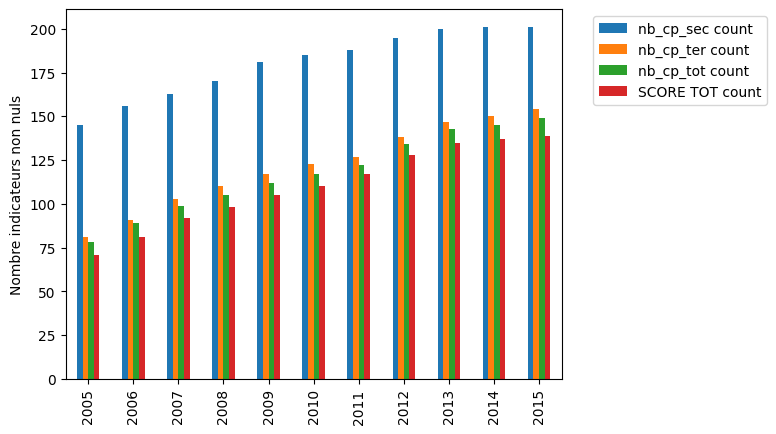

In [35]:
#Visualisation graphique de df_graph : 
plt.figure(figsize = (10, 5))
df_graph_score.plot(kind='bar')
plt.ylabel('Nombre indicateurs non nuls')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

Les indicateurs ont été cumulés d'années en années de 2005 à 2015 : 
- Remplacement de la valeur de l'indicateur par la nouvelle valeur. En cas d'abscence de nouvelle valeur, maintient de la valeur de l'année précédente. 

Ceci est bien représenté sur le graph puisque le nombre d'inicateur non nul augmente d'année en année ou au pire stagne. 


Les 3 indicateurs (nb_cp_sec, nb_cp_ter et nb_cp_tot) peuvent permettre  un classement en fonction du secteur sur lequel nous préférons nous concentrer (niveau lycée, niveau supérieur ou les deux). 

Pour la suite de l'étude nous nous concentrerons sur les deux secteurs (lycée et supérieur) avec l'utilisation de l'indicateur nb_cp_tot

In [36]:
# Visualisation des pays systématiquement présents dans le top 10 (selon le score) sur les 4 dernière années
    #(2012, 2013, 2014, 2015)

dico={}

for y in liste_annees[-4:]:
    
    tab = data_select.loc[:, y]
    tab = tab.sort_values('SCORE TOT', ascending=False)
    ls = tab.head(10).index.to_list()
    dico[y] = ls

ls_top_n = list(set(dico['2012']) & set(dico['2013']) & set(dico['2014']) & set(dico['2015']))    
print('les pays présents chaque année dans le top 10 selon SCORE TOT entre 2012 et 2015 :', ls_top_n)

les pays présents chaque année dans le top 10 selon SCORE TOT entre 2012 et 2015 : ['CHN', 'BRA', 'TUR', 'SAU', 'FRA', 'GBR', 'USA', 'JPN', 'ITA']


## 7. <a id='toc7_'></a>[Création d'un score](#toc0_)

Création d'un score total moyen, moyenne du score total de 2012 à 2015. 

L'objectif étant de les 10 meilleurs pays selon leur moyenne entre 2012 et 2015

In [37]:
# Création d'un DataFrame df à partir de data_select : 

    # Retour à un DataFrame sans multi_index sur les colonnes:  
df = data_select.stack(dropna=False)

   # Sélection des années 2012 à 2015: 
df = df.iloc[:, -4:]

    # Reset des index : 
df.reset_index(inplace=True) 

    # Suppression des lignes autres que celles de l'indicateur SCORE TOT: 
index_del = df[df['Indicator Code'] != 'SCORE TOT'].index
df = df.drop(index_del)

    # Indexation des lignes avec Country Code
df.set_index('Country Code', inplace=True)

    # Création d'une colonne SCORE TOT MOY (moyenne pondérée sur les années): 
df['SCORE TOT MOY'] = df.iloc[:,1] * 0.10 + df.iloc[:,2] * 0.15 + df.iloc[:,3] * 0.25 + df.iloc[:,4] * 0.5
df

,Indicator Code,2012,2013,2014,2015,SCORE TOT MOY
Country Code,,,,,,
ABW,SCORE TOT,0.000361,0.000422,0.000441,0.000449,0.000434
AFG,SCORE TOT,0.000275,0.000359,0.000393,0.000436,0.000398
AGO,SCORE TOT,NaN,0.000558,0.000618,0.000717,NaN
ALB,SCORE TOT,0.002290,0.002534,0.002648,0.002571,0.002557
AND,SCORE TOT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
XKX,SCORE TOT,NaN,NaN,NaN,NaN,NaN
YEM,SCORE TOT,0.001304,0.001827,0.001914,0.001374,0.001570
ZAF,SCORE TOT,0.041144,0.055422,0.056469,0.057204,0.055147


In [38]:
# Création data_final : 
    
    # Etape 1 : création du DataFrame avec les Country Code en indicateurs et la colonne SCORE TOT MOY
data_final = pd.DataFrame(df.iloc[:,-1], columns=['SCORE TOT MOY'])

    # Etape 2 : trie par ordre décroissant des pays selon le score total moyen 
data_final.sort_values('SCORE TOT MOY', ascending=False, inplace=True)

data_final.head(10)

,SCORE TOT MOY
Country Code,
USA,1.000000
CHN,0.668674
GBR,0.380572
JPN,0.296772
BRA,0.238689
FRA,0.194581
SAU,0.160098
ITA,0.157780
TUR,0.154586


On retrouve bien les 9 pays précédents, avec en plus l'apparition de KOR. 

In [39]:
# Ajout de la colonne % croissance annuelle (2015)
y = liste_annees[-1]

    # Selection dans data_select des données et création d'un DataFrame:
df = data_select.loc[:, (y, 'SP.POP.GROW')].to_frame(name=f'% croissance population ({y})')
 
    # Ajout de la colonne dans data_final : 
data_final = data_final.join(df, how='left')

data_final

,SCORE TOT MOY,% croissance population (2015)
Country Code,,
USA,1.000000,0.729732
CHN,0.668674,0.508137
GBR,0.380572,0.794968
JPN,0.296772,-0.106125
BRA,0.238689,0.852799
...,...,...
VUT,NaN,2.198185
WLD,NaN,1.186331
WSM,NaN,0.761047


In [40]:
# Ajout de la colonne Region et Short Name du dataset country : 

     # Création de df à partir de country (index = Country Code, colonne = Region et Short Name) :
df = country.loc[:,['Country Code', 'Region', 'Short Name']]
df.set_index('Country Code', inplace=True)

     # Ajout de la colonne à data_final
data_final = data_final.join(df, how='left')

     # Déplacement de la colonne Short Name en première position 
col = data_final.pop('Short Name')
data_final.insert(0, "Pays", col)

    # Déplacement de la colonne Region en seconde position
col = data_final.pop('Region')
data_final.insert(1, 'Region', col)

data_final

,Pays,Region,SCORE TOT MOY,% croissance population (2015)
Country Code,,,,
USA,United States,North America,1.000000,0.729732
CHN,China,East Asia & Pacific,0.668674,0.508137
GBR,United Kingdom,Europe & Central Asia,0.380572,0.794968
JPN,Japan,East Asia & Pacific,0.296772,-0.106125
BRA,Brazil,Latin America & Caribbean,0.238689,0.852799
...,...,...,...,...
VUT,Vanuatu,East Asia & Pacific,NaN,2.198185
WLD,World,NaN,NaN,1.186331
WSM,Samoa,East Asia & Pacific,NaN,0.761047


## 8. <a id='toc8_'></a>[Sélection des 10 meilleurs pays](#toc0_)

In [41]:
# Création de data_top_10_pays (c'est à dire sélection des 10 première lignes de data_final) : 
data_top_10_pays = data_final.head(10)

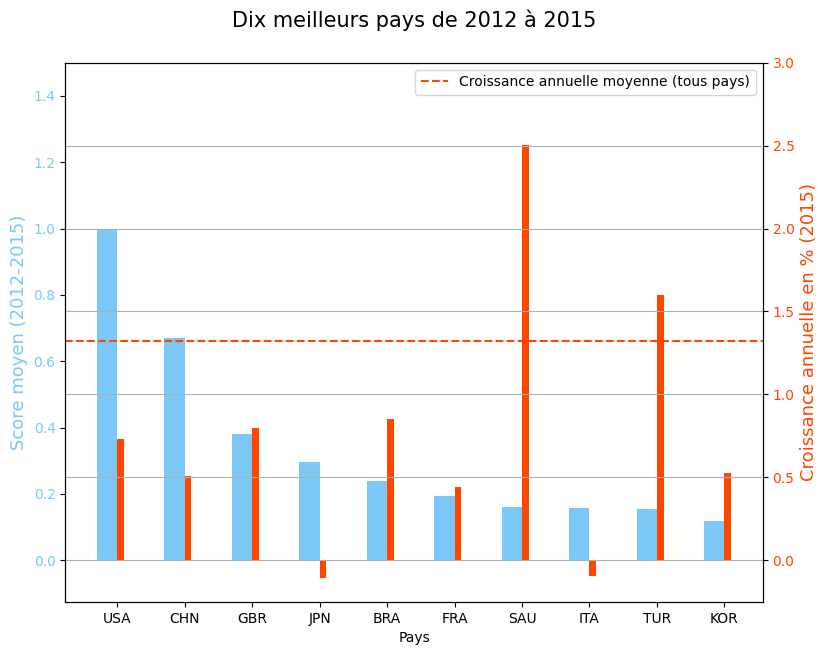

In [42]:
# Affichage du graphique de comparaison : 

# Création des données
legend_x = list(data_top_10_pays.index)
score_fig = data_top_10_pays['SCORE TOT MOY']
croissance_fig = data_top_10_pays['% croissance population (2015)']
croissance_moy_fig = data_select.loc[:,list_col[-1]]['SP.POP.GROW'].mean()
width_1 = 0.6
width_2 = 0.2
color_1 = '#7BC8F6'
color_2 = 'orangered'

# Création de la figure
fig, ax1 = plt.subplots(figsize=(9,7))
plt.title('Dix meilleurs pays de 2012 à 2015', y=1.05, fontsize=15)
plt.xlabel('Pays')

# Création graph1 (score total moyen)
ax1.bar(x=list(2*n-width_1/2 for n in range(len(legend_x))), height=score_fig, width=width_1, color=color_1)
ax1.set_ylabel(f'Score moyen ({liste_annees[-4]}-{liste_annees[-1]})', fontsize=13, color=color_1)
ax1.tick_params(axis='y', labelcolor=color_1)
ax1.set_ylim(-0.125, 1.5)

# Création du second axe
ax2 = ax1.twinx()

# Création graph2 (croissance annuelle)
ax2.set_ylabel('Croissance annuelle en % (2015)', color=color_2, fontsize=13)
ax2.bar(x=list(2*n+width_2/2 for n in range(len(legend_x))), height=croissance_fig, color=color_2, width=width_2)
ax2.set_ylim(-0.25, 3)
ax2.tick_params(axis='y', labelcolor=color_2)
ax2.set_xticks(list(2*n for n in range(len(legend_x))), legend_x)
ax2.grid(axis='y')

# Placement de la valeur de croissance annuelle moyenne en 2015 sur l'ensemble des pays : 
ax2.axhline(y=croissance_moy_fig, xmin=0, xmax=22, color=color_2, linestyle='--', label='Croissance annuelle moyenne (tous pays)')
ax2.legend()

plt.show()

### 8.1. <a id='toc8_1_'></a>[Résultats](#toc0_)

En moyenne, entre de 2012 et 2015, selon le score créé : 

1. USA, CHN et GRB sont un bon investissement initial car fort potentiel par rapport au score choisi. 

2. SAU et TUR ont un très fort potentiel pour les années à venir du fait de leur taux de croissance supérieur à la moyenne.

3. BRA  est un bon investissement secondaire au vu de son score et du taux de croissance

4. JPN et ITA ont un taux de croissance négatif donc par forcément un bon investissement sur le long terme.

## 9. <a id='toc9_'></a>[Classement par Régions](#toc0_)

Création d'un classement par région mondiale en fonction du score crée

In [43]:
# Création d'un DataFrame data_class_regions : 
data_class_regions = data_final.copy()

In [44]:
# Visualisation de valeurs manquantes potentielles :
nb = len(data_class_regions['Region'].unique())
nb_nul = data_class_regions['Region'].isnull().sum()

print(f'Il y a {nb} régions du monde de recensés et {nb_nul} pays ont une valeur région vide')

Il y a 8 régions du monde de recensés et 28 pays ont une valeur région vide


In [45]:
#Visualisation des 28 pays :  
data_class_regions.loc[data_class_regions['Region'].isnull()].count()

Pays                              27
Region                             0
SCORE TOT MOY                      0
% croissance population (2015)    26
dtype: int64

Comme on peut le constater, aucun des pays sans région référencée n'a de SCORE TOT MOY -->suppression des pays

In [46]:
# Suppression des pays avec la valeur région nulle pour l'étude : 
liste_pays_regions_nulles = list(data_final.loc[data_final['Region'].isnull()].index)
data_class_regions.drop(liste_pays_regions_nulles, inplace=True)

In [47]:
# Regroupement par région en calculant la moyenne par région sur la croissance annuelle et le score total moyen : 
data_class_regions = data_class_regions.groupby('Region').mean(['SCORE TOT MOY', '% croissance population (2015)'])

# Trie pas valeurs décroissante du score total moyen : 
data_class_regions.sort_values('SCORE TOT MOY', ascending=False, inplace=True)

data_class_regions

,SCORE TOT MOY,% croissance population (2015)
Region,,
North America,0.500164,0.576288
East Asia & Pacific,0.077017,1.123758
Europe & Central Asia,0.038701,0.356590
Latin America & Caribbean,0.024403,0.911059
Middle East & North Africa,0.023218,2.266557
South Asia,0.004957,1.599231
Sub-Saharan Africa,0.002635,2.559873


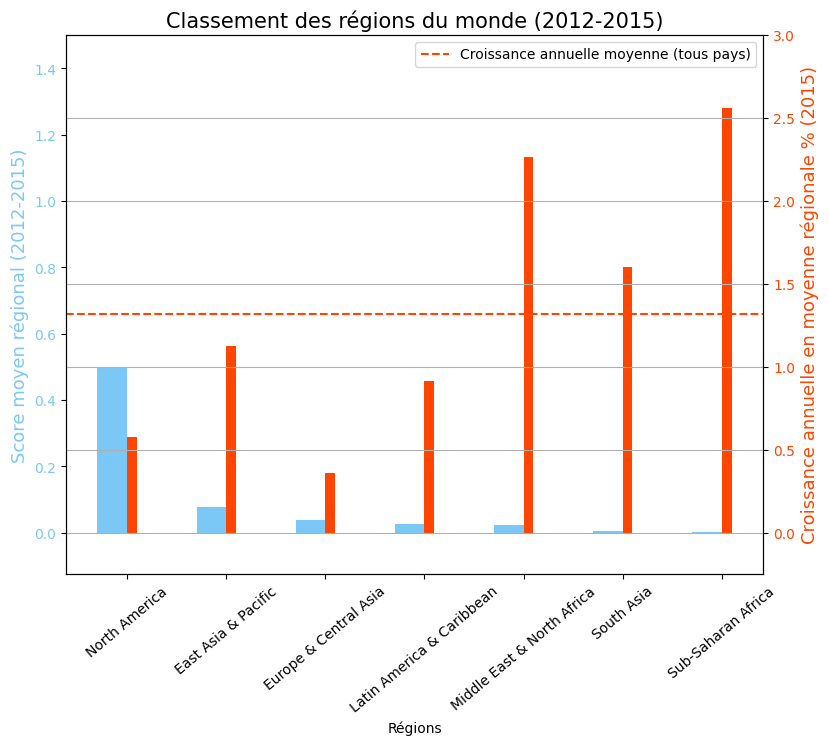

In [48]:
# Affichage du graphique de classement par régions : 

# Création des données
legend_x = list(data_class_regions.index)
score_fig = data_class_regions['SCORE TOT MOY']
croissance_fig = data_class_regions['% croissance population (2015)']
croissance_moy_fig = data_select.loc[:,list_col[-1]]['SP.POP.GROW'].mean()
width_1 = 0.6
width_2 = 0.2
color_1 = '#7BC8F6'
color_2 = 'orangered'

# Création de la figure
fig, ax1 = plt.subplots(figsize=(9,7))
plt.title('Classement des régions du monde (2012-2015)', fontsize=15)
plt.xlabel('Régions')

# Création graph1 (score total moyen)
ax1.bar(x=list(2*n-width_1/2 for n in range(len(legend_x))), height=score_fig, width=width_1, color=color_1)
ax1.set_ylabel(f'Score moyen régional ({liste_annees[-4]}-{liste_annees[-1]})', fontsize=13, color=color_1)
ax1.tick_params(axis='y', labelcolor=color_1)
ax1.tick_params(axis='x', rotation=40)
ax1.set_ylim(-0.125, 1.5)

# Création du second axe
ax2 = ax1.twinx()

# Création graph2 (croissance annuelle)
ax2.set_ylabel('Croissance annuelle en moyenne régionale % (2015)', color=color_2, fontsize=13)
ax2.bar(x=list(2*n+width_2/2 for n in range(len(legend_x))), height=croissance_fig, color=color_2, width=width_2)
ax2.set_ylim(-0.25, 3)
ax2.tick_params(axis='y', labelcolor=color_2)
ax2.set_xticks(list(2*n for n in range(len(legend_x))), legend_x)
ax2.grid(axis='y')

# Placement de la valeur de croissance annuelle moyenne en 2015 sur l'ensemble des pays : 
ax2.axhline(y=croissance_moy_fig, xmin=0, xmax=22, color=color_2, linestyle='--', label='Croissance annuelle moyenne (tous pays)')
ax2.legend()

plt.show()

### 9.1. <a id='toc9_1_'></a>[Résultat](#toc0_)

En moyenne de 2012 à 2015, en fonction du score créé : 

1. North America a une large majorité d'avance pour un investissement initial à cause du score
2. East Asia and Pacific est un bon second investissement car second au score et croissance supérieur au North America
3. Investissement à long terme car forte croissance de population : 
    - Middle East and North Africa 
    - South Asia 
    - Latin America and Caribbean 
4. Europe and Central Asia n'a pas une assez grosse croissance vis à vis de son score pour envisager un investissement
5. A voir et surveiller l'évolution de SUB-Saharan Africa car très fort croissance ==> évolutions du score à la hausse dans les années à venir ?

## 10. <a id='toc10_'></a>[Graphique de progression temporelle](#toc0_)
### 10.1. <a id='toc10_1_'></a>[Evolution du top 10 pays du score tot](#toc0_)

In [49]:
# Création d'un data_evolution_score avec le top 10 en index et score tot par année: 
data_evolution_score = pd.DataFrame(index=data_top_10_pays.index)


ls = list(data_top_10_pays.index)

for y in liste_annees[-4:]:
    serie = data_select.loc[data_select.index.isin(ls), (y, 'SCORE TOT')]
    df = serie.to_frame(name=y)
    data_evolution_score = data_evolution_score.join(df, how='left')

data_evolution_score = data_evolution_score.T
data_evolution_score

Country Code,USA,CHN,GBR,JPN,BRA,FRA,SAU,ITA,TUR,KOR
2012,1.0,0.519403,0.185367,0.245148,0.192025,0.181421,0.105321,0.150024,0.092124,0.108921
2013,1.0,0.699622,0.396324,0.313960,0.243099,0.202509,0.159771,0.172402,0.152794,0.120812
2014,1.0,0.659116,0.407483,0.300345,0.247619,0.198138,0.164993,0.153873,0.159233,0.120519
2015,1.0,0.694024,0.401432,0.300153,0.242234,0.193057,0.168703,0.156898,0.165292,0.119568


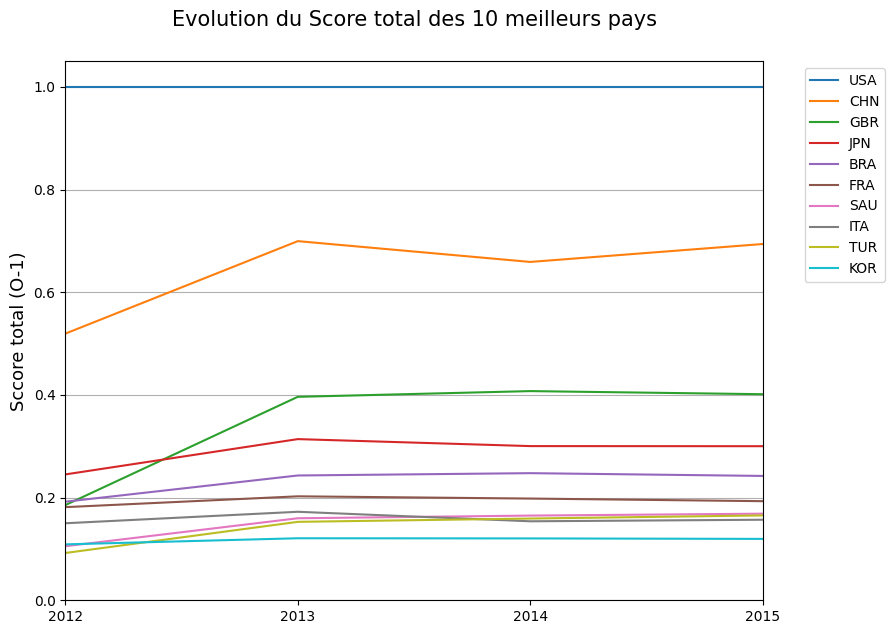

In [50]:
# Affichage du graphique 

# Création des données : 
legend_x = list(data_evolution_score.index)
ls_series = list(data_evolution_score.columns)

# Création du graphique : 
plt.figure(figsize=(9,7))

# Création des séries : 
for p in ls_series:
    x = legend_x
    y = data_evolution_score[p]
    plt.plot(x, y, label=p)

# Paramètres du graphique : 
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Evolution du Score total des 10 meilleurs pays', y=1.05, fontsize=15)
plt.ylabel('Sccore total (O-1)', fontsize=13)
plt.xlim(0, 3)
plt.ylim(0, 1.05)
plt.grid(axis='y')

plt.show()


Mise à par pour la Chine qui a un score total fluctuant ses dernière années mais reste bien au dessus, on constate que les pays ont un score stable sur les 3 dernière années 

### 10.2. <a id='toc10_2_'></a>[Evolution du top 10 pays de la croissance annuelle](#toc0_)

In [51]:
# Création d'un data_evolution_croissance avec le top 10 en index et la croissance annuelle par année: 
data_evolution_croissance = pd.DataFrame(index=data_top_10_pays.index)

ls = list(data_top_10_pays.index)

for y in liste_annees[-4:]:
    serie = data_select.loc[data_select.index.isin(ls), (y, 'SP.POP.GROW')]
    df = serie.to_frame(name=y)
    data_evolution_croissance = data_evolution_croissance.join(df, how='left')

data_evolution_croissance = data_evolution_croissance.T
data_evolution_croissance

Country Code,USA,CHN,GBR,JPN,BRA,FRA,SAU,ITA,TUR,KOR
2012,0.746420,0.487231,0.695316,-0.159711,0.938920,0.483982,2.959994,0.269541,1.568376,0.525714
2013,0.700262,0.493710,0.669534,-0.144272,0.917023,0.514636,2.907563,1.159251,1.619467,0.455219
2014,0.743124,0.506312,0.753349,-0.132694,0.887563,0.503871,2.741376,0.917504,1.627194,0.628150
2015,0.729732,0.508137,0.794968,-0.106125,0.852799,0.439411,2.504137,-0.096376,1.598009,0.527288


In [52]:
# Création de la liste du taux de croissance moyen sur tous les pays ces 4 dernières années :
ls_croissance_moy = []
for y in liste_annees[-4:]:
    ls_croissance_moy.append(data_select.loc[:, (y, 'SP.POP.GROW')].mean())
ls_croissance_moy    

[1.3856235765637237, 1.3645920065896746, 1.338406456028556, 1.3210535967375328]

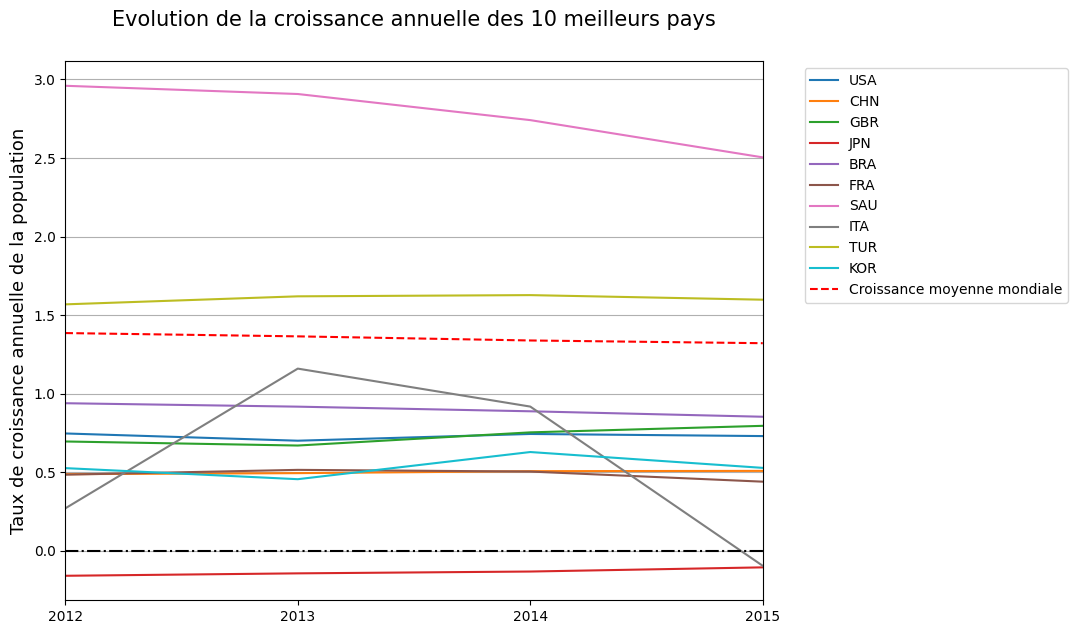

In [53]:
# Création des données : 
legend_x = list(data_evolution_croissance.index)
ls_series = list(data_evolution_croissance.columns)

# Création du graphique : 
plt.figure(figsize=(9,7))

# Création des séries : 
for p in ls_series:
    x = legend_x
    y = data_evolution_croissance[p]
    plt.plot(x, y, label=p)

plt.plot(legend_x, ls_croissance_moy, color='r', linestyle='--', label='Croissance moyenne mondiale' )

# Paramètres du graphique : 
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Evolution de la croissance annuelle des 10 meilleurs pays', y=1.05, fontsize=15)
plt.ylabel('Taux de croissance annuelle de la population', fontsize=13)
plt.xlim(0, 3)
plt.grid(axis='y')
plt.axhline(0, color='black', linestyle='-.')

plt.show()


### 10.3. <a id='toc10_3_'></a>[Résultat](#toc0_)

- JPN -> Taux de croissance négative et plus ou moins constant --> mauvais investissement
- ITA -> déclin de la croissance --> mauvais investissement
- SAU et TUR  -> Taux croissance constamment suupérieur à la moyene mondiale --> bon investissement à venir 
- Autres pays --> taux de croissance gloabelement stable mais en dessous de la moyenne mondiale. 

Cette évolution du taux de croissance du top 10 confirme les choix précédents : 
- JPN et ITA --> mauvais investissement. 
- SAU et TUR --> Très fort potentiel à venir 
- Autres pays --> bon investissement global

## 11. <a id='toc11_'></a>[PROJECTION](#toc0_)

In [54]:
# Création d'un data_projection avec les indicateurs projetés de 2025 à 2100 

ls = ['Country Code', 'Indicator Code'] + [str(y)  for y in range(2025, 2105, 5)]

data_projection = data.loc[:,ls]
data_projection.set_index(['Country Code', 'Indicator Code'], inplace=True)
data_projection.dropna(axis=0, how='all', inplace=True)
data_projection.reset_index(level=1, inplace=True)

In [55]:
# Affichage 
nb = len(data_projection.loc[data_projection.index.isin(list(data_top_10_pays.index))].index.unique())
print('Nombres de pays du Top 10 possédant des indicateurs de projection:', nb)

data_projection

Nombres de pays du Top 10 possédant des indicateurs de projection: 10


,Indicator Code,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Country Code,,,,,,,,,,,,,,,,,
WLD,PRJ.MYS.0T19.FE,2.10,2.20,2.30,2.30,2.30,2.40,2.50,2.50,2.50,2.60,2.60,2.60,2.70,2.70,2.70,2.70
WLD,PRJ.MYS.0T19.MA,2.10,2.20,2.20,2.30,2.30,2.40,2.40,2.50,2.50,2.60,2.60,2.60,2.70,2.70,2.70,2.70
WLD,PRJ.MYS.0T19.MF,2.10,2.20,2.30,2.30,2.30,2.40,2.40,2.50,2.50,2.60,2.60,2.60,2.70,2.70,2.70,2.70
WLD,PRJ.MYS.15UP.FE,8.70,9.00,9.30,9.70,10.00,10.30,10.60,10.80,11.10,11.40,11.60,11.90,12.10,12.30,12.50,12.70
WLD,PRJ.MYS.15UP.GPI,0.61,0.53,0.45,0.38,0.33,0.28,0.24,0.21,0.17,0.15,0.12,0.11,0.10,0.09,0.08,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWE,PRJ.POP.ALL.1.MA,605.74,538.90,471.82,407.10,347.67,297.53,253.28,212.14,179.40,150.11,126.43,106.82,91.70,78.21,67.56,59.06
ZWE,PRJ.POP.ALL.1.MF,1253.78,1124.63,995.32,870.21,755.65,659.02,574.00,494.23,420.47,352.09,294.10,244.68,205.47,171.39,144.86,124.17
ZWE,PRJ.POP.ALL.3.FE,2365.85,2655.48,2902.52,3104.10,3253.97,3361.11,3434.09,3469.66,3493.32,3491.72,3468.64,3429.54,3378.61,3317.67,3248.91,3175.64


Tous les pays du top 10 ont des données de projection

### 11.1. <a id='toc11_1_'></a>[Indicateur de projection :](#toc0_)

Ici, nous sélectionnerons : 

PRJ.POP.ALL.2.MF --> nbre en millier de la population totale ayant achevé le premier niveau du secondaire comme niveau le plus élevé ==> projection du nombre de clients potentiels 

In [56]:
# Filtrage de l'indicateur dans data_projection :  
liste_indicateur = ['PRJ.POP.ALL.2.MF']

data_projection = data_projection.loc[data_projection['Indicator Code'].isin(liste_indicateur)]

nb = len(data_projection.groupby('Country Code').count())
print('Nombre de pays total présent avec cet indicateur de projetion :', nb)

Nombre de pays total présent avec cet indicateur de projetion : 167


In [57]:
df = data_projection.loc[data_projection.index.isin(list(data_top_10_pays.index))]

# Création d'un data_projection_top10 (avec uniqement les pays du top 10) : 
data_projection_top10 = pd.DataFrame(index=data_top_10_pays.index)
data_projection_top10 = data_projection_top10.join(df, how='left')

data_projection_top10_var = data_projection_top10.copy()

### 11.2. <a id='toc11_2_'></a>[Etude du variation en pourcentage de l'indicateur par tranche de 5 ans](#toc0_)

In [58]:
# Création des colonnes de variation en pourcentage de l'indicateur : 
liste_années_proj = list(str(y) for y in range(2025, 2105, 25))

for i in range(len(liste_années_proj)-1):
    y_n = liste_années_proj[i]
    y_n_1 = liste_années_proj[i+1]
    col = f'{y_n}-{y_n_1}'
    
    serie = ((data_projection_top10_var.loc[:,y_n_1]/data_projection_top10_var.loc[:,y_n])-1)*100
    val = serie.to_frame(name=col)
    data_projection_top10_var = data_projection_top10_var.join(val, how='left')
        
        
# Suppression des colonnes de 2025 à 2100
ls = [str(y)  for y in range(2025, 2105, 5)]
data_projection_top10_var.drop(ls, axis=1, inplace=True)

# Renommage de l'indicateur 
data_projection_top10_var['Indicator Code'] = "PRJ.POP.ALL.2.MF (variation en %)"
data_projection_top10_var

,Indicator Code,2025-2050,2050-2075,2075-2100
Country Code,,,,
USA,PRJ.POP.ALL.2.MF (variation en %),-7.733231,-18.819906,-27.132241
CHN,PRJ.POP.ALL.2.MF (variation en %),-14.173292,-44.271802,-59.806273
GBR,PRJ.POP.ALL.2.MF (variation en %),-5.537528,-28.163803,-36.505928
JPN,PRJ.POP.ALL.2.MF (variation en %),-44.431766,-43.118341,-35.184988
BRA,PRJ.POP.ALL.2.MF (variation en %),-1.322891,-30.546232,-48.665606
FRA,PRJ.POP.ALL.2.MF (variation en %),-26.546219,-44.338060,-44.231863
SAU,PRJ.POP.ALL.2.MF (variation en %),-0.065300,-29.397392,-36.542494
ITA,PRJ.POP.ALL.2.MF (variation en %),-29.119241,-53.426942,-54.494460
TUR,PRJ.POP.ALL.2.MF (variation en %),-10.874938,-41.013168,-54.070415


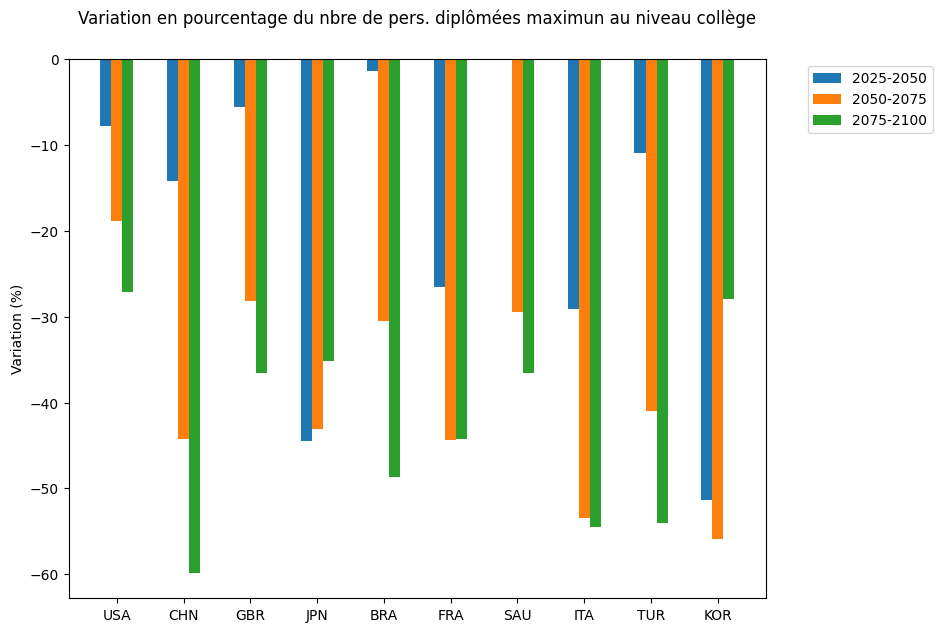

In [59]:
# Création d'un graphique pour visualiser la variation en pourcentage de l'indicateur de projection : 
    # Création des données : 
legend_x = list(data_projection_top10_var.index)
ls_serie = list(data_projection_top10_var.columns[1:])
width = 0.33
w = - width

# Création de la figure : 
fig, ax = plt.subplots(figsize=(9,7))

# Création des graphique par pays du top 10 : 
for y in ls_serie: 
    serie = data_projection_top10_var.loc[:, y]
    serie = serie
    plt.bar(x=[2*n + w for n in range(len(legend_x))], height=serie, label=y, width=width)
    w+=width
    
# Paramètres du graphique : 
plt.title('Variation en pourcentage du nbre de pers. diplômées maximun au niveau collège', y=1.05)
plt.ylabel('Variation (%)')
plt.legend(bbox_to_anchor=(1.05, 1))
ax.set_xticks(list(2*n for n in range(len(legend_x))), legend_x)

plt.show()

Ce graphique n'est pas réellement pertinent en terme d'interprétation. 

### 11.3. <a id='toc11_3_'></a>[Etude de l'évolution de l'indicateur](#toc0_)

In [60]:
# Création de data_projection_top10_evo :

data_projection_top10_evo = data_projection_top10.T
data_projection_top10_evo

Country Code,USA,CHN,GBR,JPN,BRA,FRA,SAU,ITA,TUR,KOR
Indicator Code,PRJ.POP.ALL.2.MF,PRJ.POP.ALL.2.MF,PRJ.POP.ALL.2.MF,PRJ.POP.ALL.2.MF,PRJ.POP.ALL.2.MF,PRJ.POP.ALL.2.MF,PRJ.POP.ALL.2.MF,PRJ.POP.ALL.2.MF,PRJ.POP.ALL.2.MF,PRJ.POP.ALL.2.MF
2025,29480.69,533509.64,21460.84,8316.91,35634.83,5762.93,6110.28,16773.48,6834.43,4295.98
2030,28110.7,535574.96,21849.48,7524.7,36530.34,5571.15,6206.11,15991.16,6907.6,3902.58
2035,28276.05,528710.66,21906.47,6624.59,37150.74,5307.29,6306.54,15168.62,6879.94,3495.15
2040,28199.32,512859.54,21652.74,5820.37,37114.5,4984.32,6295.37,14208.87,6725.04,3049.29
2045,27828.94,488837.62,21091.39,5160.1,36378.25,4618.48,6236.85,13119.98,6455.62,2580.18
2050,27200.88,457893.76,20272.44,4621.56,35163.42,4233.09,6106.29,11889.17,6091.19,2092.08
2055,26325.24,421137.84,19282.84,4164.33,33598.01,3834.48,5867.17,10539.23,5653.14,1654.25
2060,25224.73,380319.9,18183.8,3750.02,31694.52,3430.5,5506.2,9137.22,5152.36,1334.96
2065,24089.97,337748.58,16983.49,3337.15,29458.36,3034.09,5115.29,7770.35,4618.84,1129.06


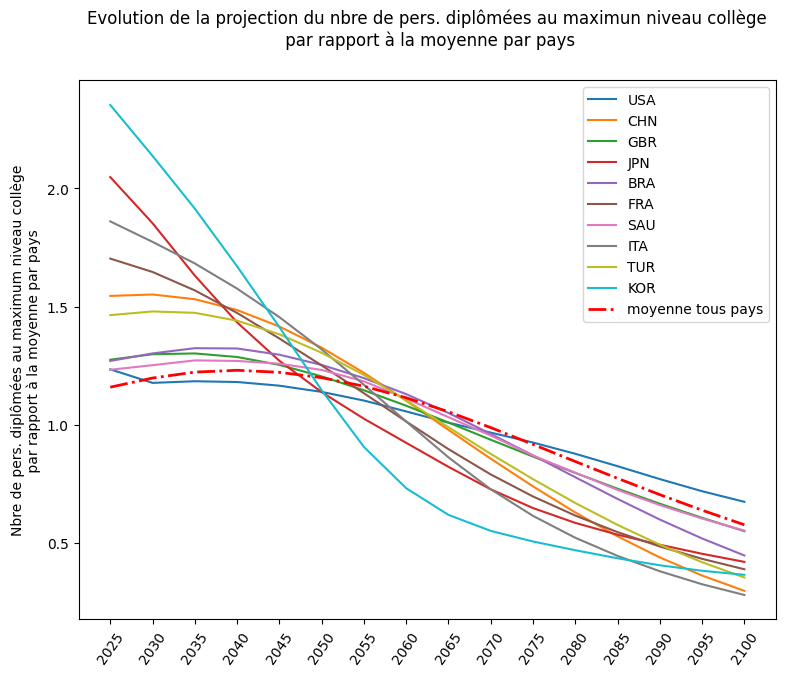

In [61]:
# Affichage du grpahique : 

# Création des données : 
legend_x = list(data_projection_top10_evo.index[1:])
pays = list(data_projection_top10_evo.columns)
    # Création de la donnée évolutive moyenne (sur tous pays de l'indicateur) : 
moyenne_tot = list(data_projection.loc[:,legend_x].mean()) 
m = sum(moyenne_tot)/len(moyenne_tot)
moyenne_tot = [i/m for i in moyenne_tot]

# Création de la figure : 
fig, ax = plt.subplots(figsize=(9,7))

# Création des graphique pour chaque pays du top 10 :
for p in pays: 
    serie = data_projection_top10_evo.loc[legend_x, p]
    serie = serie/serie.mean()
    
    plt.plot(legend_x, serie, label=p)

# Création du graphique pour la moyenne de l'ensemble des pays : 
plt.plot(legend_x,moyenne_tot, label='moyenne tous pays', color ='r', linestyle='-.', linewidth=2)  

# Paramètres de la figure : 
plt.legend()
plt.title("Evolution de la projection du nbre de pers. diplômées au maximun niveau collège\n par rapport à la moyenne par pays", y=1.05)
plt.ylabel('Nbre de pers. diplômées au maximum niveau collège\n par rapport à la moyenne par pays ')
plt.xticks(rotation=55)

plt.show()

Tous les pays de 2025 à 2100 ont tendance à avoir une diminution du nombre de pers. ayant pour niveau scolaire maximum, le niveau lycée.   

### 11.4. <a id='toc11_4_'></a>[Top 10 des pays avec l'indicateur de projection en 2025](#toc0_)

In [62]:
# Création d'un data_projection_Ntop10_2025 avec le Top 10 en 2025 :  
data_projection_Ntop10_2025 = data_projection.iloc[:,:2]
data_projection_Ntop10_2025 = data_projection_Ntop10_2025.sort_values('2025', ascending=False).head(10)
data_projection_Ntop10_2025

,Indicator Code,2025
Country Code,,
WLD,PRJ.POP.ALL.2.MF,1352650.50
CHN,PRJ.POP.ALL.2.MF,533509.64
IND,PRJ.POP.ALL.2.MF,158642.27
IDN,PRJ.POP.ALL.2.MF,44519.18
BRA,PRJ.POP.ALL.2.MF,35634.83
MEX,PRJ.POP.ALL.2.MF,33371.16
USA,PRJ.POP.ALL.2.MF,29480.69
VNM,PRJ.POP.ALL.2.MF,27414.97
BGD,PRJ.POP.ALL.2.MF,26291.18


In [63]:
# Récupération du top 10 2025 dans une liste : 
top10_projection_2025 = list(data_projection_Ntop10_2025.index)
top10_projection_2025

['WLD', 'CHN', 'IND', 'IDN', 'BRA', 'MEX', 'USA', 'VNM', 'BGD', 'GBR']

In [64]:
# Récupération du top 10 avec le score dans une liste : 
top10_score = list(data_projection_top10.index)
top10_score

['USA', 'CHN', 'GBR', 'JPN', 'BRA', 'FRA', 'SAU', 'ITA', 'TUR', 'KOR']

In [65]:
# Création de new_top (liste avec tous les pays du top 10 score et projection) : 
new_top = top10_score + top10_projection_2025
    # Suppression des doublons : 
new_top = list(set(new_top))
new_top

['CHN',
 'BRA',
 'WLD',
 'TUR',
 'SAU',
 'IDN',
 'BGD',
 'FRA',
 'VNM',
 'GBR',
 'IND',
 'USA',
 'JPN',
 'ITA',
 'MEX',
 'KOR']

In [66]:
# Création du nouveau data_top_pays à partir de la liste new_top : 
data_top_pays = data_final.loc[data_final.index.isin(new_top)]

    # Création d'une liste d'index à supprimer (pays sans score) : 
ls = list(data_top_pays.loc[data_top_pays['SCORE TOT MOY'].isnull()].index)
    # Suppresion des lignes correspondantes : 
data_top_pays = data_top_pays.drop(ls, axis=0)

data_top_pays

,Pays,Region,SCORE TOT MOY,% croissance population (2015)
Country Code,,,,
USA,United States,North America,1.000000,0.729732
CHN,China,East Asia & Pacific,0.668674,0.508137
GBR,United Kingdom,Europe & Central Asia,0.380572,0.794968
JPN,Japan,East Asia & Pacific,0.296772,-0.106125
BRA,Brazil,Latin America & Caribbean,0.238689,0.852799
FRA,France,Europe & Central Asia,0.194581,0.439411
SAU,Saudi Arabia,Middle East & North Africa,0.160098,2.504137
ITA,Italy,Europe & Central Asia,0.157780,-0.096376
TUR,Turkey,Europe & Central Asia,0.154586,1.598009


#### 11.4.1. <a id='toc11_4_1_'></a>[Regroupement et visualisation graphique](#toc0_)

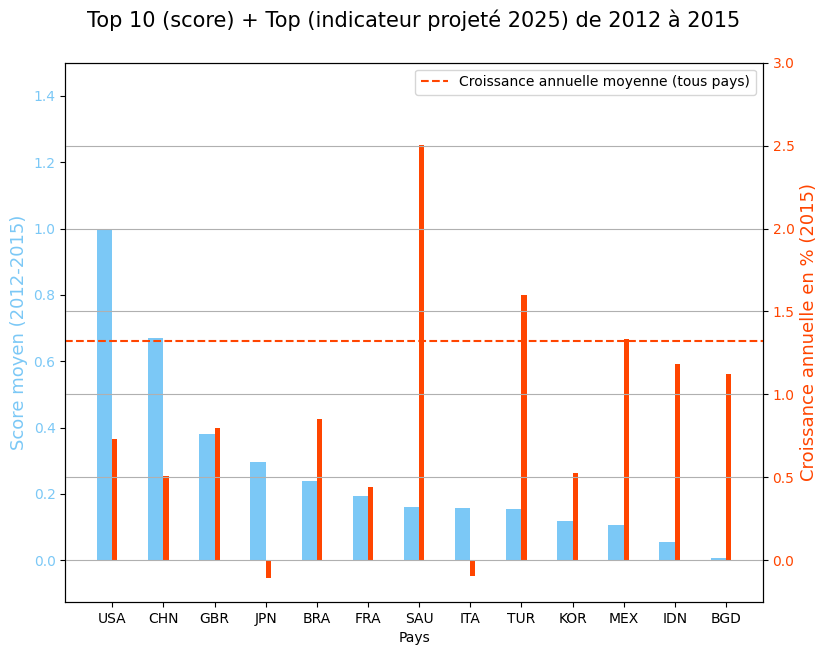

In [67]:
# Création des données
legend_x = list(data_top_pays.index)
score_fig = data_top_pays['SCORE TOT MOY']
croissance_fig = data_top_pays['% croissance population (2015)']
croissance_moy_fig = data_select.loc[:,list_col[-1]]['SP.POP.GROW'].mean()
width_1 = 0.6
width_2 = 0.2
color_1 = '#7BC8F6'
color_2 = 'orangered'

# Création de la figure
fig, ax1 = plt.subplots(figsize=(9,7))
plt.title('Top 10 (score) + Top (indicateur projeté 2025) de 2012 à 2015', y=1.05, fontsize=15)
plt.xlabel('Pays')

# Création graph1 (score total moyen)
ax1.bar(x=list(2*n-width_1/2 for n in range(len(legend_x))), height=score_fig, width=width_1, color=color_1)
ax1.set_ylabel(f'Score moyen ({liste_annees[-4]}-{liste_annees[-1]})', fontsize=13, color=color_1)
ax1.tick_params(axis='y', labelcolor=color_1)
ax1.set_ylim(-0.125, 1.5)

# Création du second axe
ax2 = ax1.twinx()

# Création graph2 (croissance annuelle)
ax2.set_ylabel('Croissance annuelle en % (2015)', color=color_2, fontsize=13)
ax2.bar(x=list(2*n+width_2/2 for n in range(len(legend_x))), height=croissance_fig, color=color_2, width=width_2)
ax2.set_ylim(-0.25, 3)
ax2.tick_params(axis='y', labelcolor=color_2)
ax2.set_xticks(list(2*n for n in range(len(legend_x))), legend_x)
ax2.grid(axis='y')

# Placement de la valeur de croissance annuelle moyenne en 2015 sur l'ensemble des pays : 
ax2.axhline(y=croissance_moy_fig, xmin=0, xmax=22, color=color_2, linestyle='--', label='Croissance annuelle moyenne (tous pays)')
ax2.legend()

plt.show()

**Observations** : 

Sur la base de l'indicateur projeté en 2025, on ajoute donc au total 3 pays : 
 - MEX, IDN et BGD, 3 pays à fort potentiel. 
 
 1. MEX de la région Latin America & Caribbean : région à forte croissance démographique ==> fort potentiel + proche North America 
 2. IDN de la région East Asia & Pacific	 : région déjà repérée dans les régions prometteuses + présence de la CHN et de la KOR. 
 3. BGD de la région South Asia	: région également identifiée comme prometteuse à l'avenir.

## 12. <a id='toc12_'></a>[Création des statistiques par pays et région](#toc0_)
Création par pays/région, les statistiques (moyenne, écart-type, médiane) par indicateurs

In [68]:
# Affichgage de data_stats : 
data_stats.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arab World,ARB,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,6.899156e+06,7.214648e+06,7.588664e+06,8.006892e+06,8.382284e+06,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9.966484e+06,9.966484e+06
1,Arab World,ARB,"Enrolment in upper secondary education, both s...",UIS.E.3,1.073953e+07,1.070008e+07,1.037482e+07,1.030286e+07,1.017877e+07,1.064478e+07,1.162018e+07,1.202761e+07,1.202161e+07,1.199598e+07,1.199598e+07
2,Arab World,ARB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,1.140472e+04,1.228111e+04,1.300436e+04,1.373891e+04,1.385056e+04,1.444467e+04,1.482591e+04,1.571614e+04,1.605255e+04,1.605255e+04,1.605255e+04
3,Arab World,ARB,"Graduates from tertiary education, both sexes ...",SE.TER.GRAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,8.393142e+00,1.165465e+01,1.420590e+01,1.859353e+01,2.297369e+01,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,3.686860e+01,3.686860e+01


In [69]:
# Création de df pour les calculs statistiques : 
data_stats.drop(['Country Name', 'Indicator Name'], axis=1, inplace=True)
data_stats.set_index(['Country Code', 'Indicator Code'], inplace=True)
df = pd.DataFrame(index=data_stats.index)

In [70]:
# Calcul et ajout de la moyenne : 
mean = data_stats.T.mean().to_frame('Mean')
df = df.join(mean, how='left')

# Calcul et ajout de l'écart-type : 
std = data_stats.T.std().to_frame('Std')
df = df.join(std, how='left')

# Calcul et ajout de la médiane : 
mediane = data_stats.T.median().to_frame('Median')
df = df.join(mediane, how='left')

df

Mean           Std        Median
Country Code Indicator Code                                             
ARB          SE.TER.ENRL        8.560917e+06  1.070025e+06  8.594488e+06
             UIS.E.3            1.114565e+07  7.791115e+05  1.073953e+07
             NY.GDP.PCAP.PP.CD  1.431127e+04  1.617711e+03  1.444467e+04
             SE.TER.GRAD                 NaN           NaN           NaN
             IT.NET.USER.P2     2.517236e+01  1.069712e+01  2.674725e+01
...                                      ...           ...           ...
ZWE          UIS.E.3            4.881430e+05  4.758000e+03  4.905220e+05
             NY.GDP.PCAP.PP.CD  1.626424e+03  3.163808e+02  1.480265e+03
             SE.TER.GRAD        2.045017e+04  8.951968e+03  1.583100e+04
             IT.NET.USER.P2     8.791596e+00  6.923631e+00  6.400000e+00
             SP.POP.GROW        1.917228e+00  3.901219e-01  1.976756e+00

[1452 rows x 3 columns]

In [71]:
df.reset_index(level=1, inplace=True)
df

,Indicator Code,Mean,Std,Median
Country Code,,,,
ARB,SE.TER.ENRL,8.560917e+06,1.070025e+06,8.594488e+06
ARB,UIS.E.3,1.114565e+07,7.791115e+05,1.073953e+07
ARB,NY.GDP.PCAP.PP.CD,1.431127e+04,1.617711e+03,1.444467e+04
ARB,SE.TER.GRAD,NaN,NaN,NaN
ARB,IT.NET.USER.P2,2.517236e+01,1.069712e+01,2.674725e+01
...,...,...,...,...
ZWE,UIS.E.3,4.881430e+05,4.758000e+03,4.905220e+05
ZWE,NY.GDP.PCAP.PP.CD,1.626424e+03,3.163808e+02,1.480265e+03
ZWE,SE.TER.GRAD,2.045017e+04,8.951968e+03,1.583100e+04


In [72]:
# Récupération des régions : 
serie = data_final['Region'].to_frame('Region')
serie

,Region
Country Code,
USA,North America
CHN,East Asia & Pacific
GBR,Europe & Central Asia
JPN,East Asia & Pacific
BRA,Latin America & Caribbean
...,...
VUT,East Asia & Pacific
WLD,NaN
WSM,East Asia & Pacific


In [73]:
# Ajout des régions correspondantes à df : 
df = df.join(serie, how='left')
col = df.pop("Region")
df.insert(1,'Region', col)
df

,Indicator Code,Region,Mean,Std,Median
Country Code,,,,,
ABW,SE.TER.ENRL,Latin America & Caribbean,1991.545455,535.741423,2196.000000
ABW,UIS.E.3,Latin America & Caribbean,4297.636364,465.787564,4060.000000
ABW,NY.GDP.PCAP.PP.CD,Latin America & Caribbean,35973.780510,0.000000,35973.780510
ABW,SE.TER.GRAD,Latin America & Caribbean,294.000000,87.604794,285.000000
ABW,IT.NET.USER.P2,Latin America & Caribbean,59.149202,22.700599,62.000000
...,...,...,...,...,...
ZWE,UIS.E.3,Sub-Saharan Africa,488143.000000,4758.000000,490522.000000
ZWE,NY.GDP.PCAP.PP.CD,Sub-Saharan Africa,1626.424289,316.380848,1480.264697
ZWE,SE.TER.GRAD,Sub-Saharan Africa,20450.166667,8951.968329,15831.000000


In [74]:
# Création d'une copie de df : 
df_copy = df.copy()

In [75]:
# Formatage de df : 
df.reset_index(inplace=True)
df.set_index(['Country Code','Indicator Code'], inplace=True)
df

Region           Mean  \
Country Code Indicator Code                                                
ABW          SE.TER.ENRL        Latin America & Caribbean    1991.545455   
             UIS.E.3            Latin America & Caribbean    4297.636364   
             NY.GDP.PCAP.PP.CD  Latin America & Caribbean   35973.780510   
             SE.TER.GRAD        Latin America & Caribbean     294.000000   
             IT.NET.USER.P2     Latin America & Caribbean      59.149202   
...                                                   ...            ...   
ZWE          UIS.E.3                   Sub-Saharan Africa  488143.000000   
             NY.GDP.PCAP.PP.CD         Sub-Saharan Africa    1626.424289   
             SE.TER.GRAD               Sub-Saharan Africa   20450.166667   
             IT.NET.USER.P2            Sub-Saharan Africa       8.791596   
             SP.POP.GROW               Sub-Saharan Africa       1.917228   

                                        Std         Median  
Country Code Indicator Code                                 
ABW          SE.TER.ENRL         535.741423    2196.000000  
             UIS.E.3             465.787564    4060.000000  
             NY.GDP.PCAP.PP.CD     0.000000   35973.780510  
             SE.TER.GRAD          87.604794     285.000000  
             IT.NET.USER.P2       22.700599      62.000000  
...                                     ...            ...  
ZWE          UIS.E.3            4758.000000  490522.000000  
             NY.GDP.PCAP.PP.CD   316.380848    1480.264697  
             SE.TER.GRAD        8951.968329   15831.000000  
             IT.NET.USER.P2        6.923631       6.400000  
             SP.POP.GROW           0.390122       1.976756  

[1452 rows x 4 columns]

In [76]:
# Formatage de df_copy pour obtenir les statistiques par région : 
df_copy.groupby(['Region', 'Indicator Code']).mean()

Mean           Std  \
Region                     Indicator Code                                  
East Asia & Pacific        IT.NET.USER.P2     3.240475e+01  8.363660e+00   
                           NY.GDP.PCAP.PP.CD  1.892217e+04  2.876718e+03   
                           SE.TER.ENRL        2.288541e+06  4.107856e+05   
                           SE.TER.GRAD        5.851973e+05  1.412932e+05   
                           SP.POP.GROW        1.048917e+00  2.528308e-01   
                           UIS.E.3            2.222299e+06  1.362945e+05   
Europe & Central Asia      IT.NET.USER.P2     5.697781e+01  1.148096e+01   
                           NY.GDP.PCAP.PP.CD  2.633227e+04  3.363772e+03   
                           SE.TER.ENRL        7.498350e+05  8.610297e+04   
                           SE.TER.GRAD        1.687621e+05  1.791555e+04   
                           SP.POP.GROW        3.859083e-01  3.236413e-01   
                           UIS.E.3            6.554242e+05  7.548365e+04   
Latin America & Caribbean  IT.NET.USER.P2     3.534071e+01  1.219145e+01   
                           NY.GDP.PCAP.PP.CD  1.476814e+04  1.351675e+03   
                           SE.TER.ENRL        6.472977e+05  9.586035e+04   
                           SE.TER.GRAD        8.805610e+04  1.729582e+04   
                           SP.POP.GROW        1.071809e+00  2.405197e-01   
                           UIS.E.3            6.296355e+05  4.325574e+04   
Middle East & North Africa IT.NET.USER.P2     3.556637e+01  1.467730e+01   
                           NY.GDP.PCAP.PP.CD  3.014942e+04  3.326427e+03   
                           SE.TER.ENRL        5.846215e+05  1.089938e+05   
                           SE.TER.GRAD        9.939898e+04  2.040010e+04   
                           SP.POP.GROW        3.105160e+00  1.127171e+00   
                           UIS.E.3            7.042409e+05  7.230785e+04   
North America              IT.NET.USER.P2     7.889210e+01  6.472668e+00   
                           NY.GDP.PCAP.PP.CD  4.824779e+04  2.946177e+03   
                           SE.TER.ENRL        9.614770e+06  6.822438e+05   
                           SE.TER.GRAD        1.565882e+06  2.422690e+05   
                           SP.POP.GROW        6.929970e-01  2.553640e-01   
                           UIS.E.3            4.464164e+06  1.008348e+05   
South Asia                 IT.NET.USER.P2     1.173579e+01  7.604008e+00   
                           NY.GDP.PCAP.PP.CD  5.193471e+03  1.014757e+03   
                           SE.TER.ENRL        3.217909e+06  1.067771e+06   
                           SE.TER.GRAD        1.242983e+06  9.350664e+04   
                           SP.POP.GROW        1.743626e+00  3.188720e-01   
                           UIS.E.3            8.566477e+06  1.299435e+06   
Sub-Saharan Africa         IT.NET.USER.P2     8.602426e+00  5.303727e+00   
                           NY.GDP.PCAP.PP.CD  4.504956e+03  6.148898e+02   
                           SE.TER.ENRL        1.431784e+05  3.013813e+04   
                           SE.TER.GRAD        2.501824e+04  3.996464e+03   
                           SP.POP.GROW        2.581525e+00  1.908703e-01   
                           UIS.E.3            3.603061e+05  6.143246e+04   

                                                    Median  
Region                     Indicator Code                   
East Asia & Pacific        IT.NET.USER.P2     3.157723e+01  
                           NY.GDP.PCAP.PP.CD  1.870921e+04  
                           SE.TER.ENRL        2.298500e+06  
                           SE.TER.GRAD        5.694320e+05  
                           SP.POP.GROW        1.020964e+00  
                           UIS.E.3            2.230833e+06  
Europe & Central Asia      IT.NET.USER.P2     5.791790e+01  
                           NY.GDP.PCAP.PP.CD  2.628158e+04  
                           SE.TER.ENRL        7.614877e+05  
                           SE.TER.GRAD